In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from numpy import array
import vibration_toolbox as vb
import scienceplots

np.set_printoptions(precision=3, suppress=True)

plt.style.use([
    'grid',
    'retro'
])

In [7]:
m_v = 1500
J_v = 2400
m_d = 100
m_t = 100

M = np.diag([m_v, J_v, m_d, m_t])

c_sd = 500
c_st = 500

l_d  = 1.17
l_t  = 1.68

C = array([
    [c_sd+c_st, l_d*c_sd-l_t*c_st, -c_sd, -c_st],
    [l_d*c_sd-l_t*c_st, l_d**2*c_sd+l_t**2*c_st, -l_d*c_sd, l_t*c_st],
    [-c_sd, -l_d*c_sd, c_sd, 0],
    [-c_st, l_t*c_st, 0, c_st]
])

k_sd = 30000
k_st = 30000
kd   = 300000
kt   = 300000

K = array([
    [k_sd+k_st, l_d*k_sd-l_t*k_st, -k_sd, -k_st],
    [l_d*k_sd-l_t*k_st, l_d**2*k_sd+l_t**2*k_st, -l_d*k_sd, l_t*k_st],
    [-k_sd, -l_d*k_sd, k_sd+kd, 0],
    [-k_st, l_t*k_st, 0, k_st+kt]
])

X0 = array([
    [1],
    [0],
    [1],
    [0],
])

V0 = array([
    [0],
    [1],
    [0],
    [1],
])

N = M.shape[0]

vb_sys = vb.VibeSystem(M, C, K)

In [8]:
A = np.block([
    [np.zeros((N, N)), np.eye(N)],
    [-np.linalg.inv(M)@K, -np.linalg.inv(M)@C]
])

B = np.block([
    [np.zeros((N, N))],
    [np.linalg.inv(M)]
])

C = np.eye(2*N)
D = np.zeros((2*N, N))

sys = ct.ss(A, B, C, D)

In [9]:
# frequencys
wn, zeta, _ = ct.damp(sys)

wn    = wn[::2]
zeta = zeta[::2]

wn, zeta

_____Eigenvalue______ Damping___ Frequency_
   -0.2475    +5.717j    0.04326      5.722
   -0.2475    -5.717j    0.04326      5.722
   -0.3868    +7.147j    0.05404      7.157
   -0.3868    -7.147j    0.05404      7.157
    -2.553     +57.4j    0.04443      57.45
    -2.553     -57.4j    0.04443      57.45
    -2.583     +57.4j    0.04496      57.46
    -2.583     -57.4j    0.04496      57.46


(array([ 5.722,  7.157, 57.452, 57.456]), array([0.043, 0.054, 0.044, 0.045]))

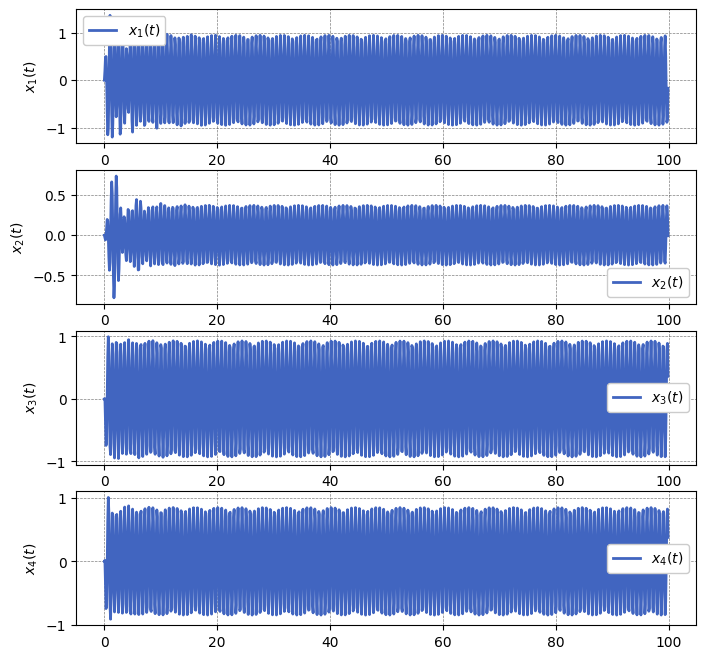

In [10]:
sampling_period = 1e-1
samples = 1000

t = np.arange(0, samples*sampling_period, sampling_period)

U = np.zeros((N, t.shape[0]))

wf = 55/(2*np.pi)

U[2, :] = kd*np.cos(wf*t - np.arctan2( (2*zeta[2]*wn[2]*wf), (wn[2]**2 - wf**2) ))
U[3, :] = kt*np.cos(wf*t - np.arctan2( (2*zeta[3]*wn[3]*wf), (wn[3]**2 - wf**2) ))

t, y = ct.forced_response(sys, t, U,)

fig, ax = plt.subplots(N, 1, figsize=(8, 8))

for i in range(N):
    ax[i].plot(t, y[i, :], label=f'$x_{i+1}(t)$')
    ax[i].set_ylabel(f'$x_{i+1}(t)$')
    ax[i].legend()
